colabfold_batch --msa-mode single_sequence /nfs/polizzi/bfry/programs/NISE/design_campaign_apx_ntf2/test_dimerization/dimer_colabfold_input.fasta ./colabfold_outputs

# Analyze

In [1]:
import shutil
from pathlib import Path
import prody as pr
import pandas as pd

paths = [
    '/nfs/polizzi/bfry/programs/NISE/design_campaign_apx_ntf2/pose_00/top_designs_by_bbuns', 
    '/nfs/polizzi/bfry/programs/NISE/design_campaign_apx_ntf2/pose_01/top_designs_by_bbuns', 
    '/nfs/polizzi/bfry/programs/NISE/design_campaign_apx_ntf2/pose_02/top_designs_by_bbuns', 
    '/nfs/polizzi/bfry/programs/NISE/design_campaign_apx_ntf2/pose_03/top_designs_by_bbuns',
    '/nfs/polizzi/bfry/programs/NISE/design_campaign_apx_ntf2/pose_04/top_designs_by_bbuns',
    '/nfs/polizzi/bfry/programs/NISE/design_campaign_apx_ntf2/pose_05/top_designs_by_bbuns',
]

opath = Path('./af2_inputs/')
opath.mkdir(exist_ok=True)

all_data = []
for path in paths:
    path = Path(path)
    parent_dir = path.parent.stem

    for pdb in sorted(list(path.glob('*.pdb'))):
        protein = pr.parsePDB(str(pdb))
        protein_seq = protein.ca.getSequence()
        all_data.append({'parent': parent_dir, 'pdb_path': pdb.absolute(), 'sequence': protein_seq})

df = pd.DataFrame(all_data)
df

parent                                           pdb_path  \
0     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
2     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
3     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
4     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
...       ...                                                ...   
1495  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1496  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1497  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1498  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1499  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   

                                               sequence  
0     APSLVEQARELGKELVEAANSGDTEKVSSLLAPDATLTLSDGTKLT...  
1     APSLEDQARQLGQDLVDAANEGDVEKIKSMLAPDATMTLEDGTVLT...  
2     MPSMIEQARKLGQQLVEAVNAGDTEKVRSLLAPNATLTLADGTKLT...  
3     PPSLEERARQLGKELVEAANEGDTEKVRSLLAPDATMELQNGTVLT...  
4     APSLQDQAKKLGEDLVRAANEGDSQKIKSMLAPDATMTLDNGKKLT...  
...                                                 ...  
1495  HAHEERGEEAIKLTKEVFEAYNSGDFEKLKELFADDFYAVDGSGKR...  
1496  SELPSNAERARELTRKVFEALNSGDFEKLESLFSDDFFAVDGEGKV...  
1497  PPLSHAGDLAVQLTQEVFEAYNSGDFDKLRELFADDFYAEDGEGQR...  
1498  PPHEAAAEEAKKLTREVFEAYNSGDFDKLRELFADDFYATDGSGKR...  
1499  GHMPSNAELAQQLTKEVFEALNSGDFEKLESLFTEDFYATDGQGKK...  

[1500 rows x 3 columns]

In [5]:
import json
import numpy as np
import pandas as pd

def get_af2_metadata(parent, opath):
    af2_output_dir = opath / parent
    all_data = []
    for pdb in sorted(list(af2_output_dir.glob('*unrelaxed_rank_001_*.pdb'))):
        pae = pdb.parent / f"{pdb.stem.replace('_unrelaxed_', '_scores_')}.json"
        with pae.open('r') as f:
            pae_data = json.load(f)
            pae_mtx = pae_data['pae']
            iptm = pae_data['iptm']
            min_protein_plddt = min(np.mean(pae_data['plddt'][:len(pae_data['plddt']) // 2]), np.mean(pae_data['plddt'][len(pae_data['plddt']) // 2:]))
        
        sequence = pr.parsePDB(str(pdb)).select('chid A and name CA').getSequence()

        data = {'pae_mtx': pae_mtx, 'iptm': iptm, 'min_protein_plddt': min_protein_plddt, 'af2_dimer_path': pdb.absolute(), 'sequence': sequence}
        all_data.append(data)
    return pd.DataFrame(all_data)
    
dfs = []
for parent in ['pose_00-01', 'pose_02-03', 'pose_04-05']:
    df_ = get_af2_metadata(parent, opath)
    dfs.append(df_)

df2 = pd.concat(dfs)

In [6]:
df = pd.merge(df, df2, on='sequence')
df

parent                                           pdb_path  \
0     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
2     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
3     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
4     pose_00  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
...       ...                                                ...   
1491  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1492  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1493  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1494  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   
1495  pose_05  /nfs/polizzi/bfry/programs/NISE/design_campaig...   

                                               sequence  \
0     APSLVEQARELGKELVEAANSGDTEKVSSLLAPDATLTLSDGTKLT...   
1     APSLEDQARQLGQDLVDAANEGDVEKIKSMLAPDATMTLEDGTVLT...   
2     MPSMIEQARKLGQQLVEAVNAGDTEKVRSLLAPNATLTLADGTKLT...   
3     PPSLEERARQLGKELVEAANEGDTEKVRSLLAPDATMELQNGTVLT...   
4     APSLQDQAKKLGEDLVRAANEGDSQKIKSMLAPDATMTLDNGKKLT...   
...                                                 ...   
1491  HAHEERGEEAIKLTKEVFEAYNSGDFEKLKELFADDFYAVDGSGKR...   
1492  SELPSNAERARELTRKVFEALNSGDFEKLESLFSDDFFAVDGEGKV...   
1493  PPLSHAGDLAVQLTQEVFEAYNSGDFDKLRELFADDFYAEDGEGQR...   
1494  PPHEAAAEEAKKLTREVFEAYNSGDFDKLRELFADDFYATDGSGKR...   
1495  GHMPSNAELAQQLTKEVFEALNSGDFEKLESLFTEDFYATDGQGKK...   

                                                pae_mtx  iptm  \
0     [[0.75, 1.09, 3.23, 5.07, 5.07, 4.28, 5.02, 7....  0.18   
1     [[0.75, 1.13, 2.86, 4.98, 4.28, 3.97, 4.68, 7....  0.14   
2     [[0.75, 1.72, 4.49, 6.84, 8.65, 6.09, 8.23, 11...  0.16   
3     [[0.75, 1.16, 3.33, 5.01, 5.04, 4.53, 5.34, 6....  0.43   
4     [[0.75, 1.16, 3.06, 5.42, 4.74, 4.03, 5.27, 7....  0.16   
...                                                 ...   ...   
1491  [[0.75, 1.38, 3.16, 5.03, 4.13, 4.41, 7.16, 7....  0.11   
1492  [[0.75, 2.04, 4.28, 7.37, 9.52, 10.6, 12.67, 1...  0.23   
1493  [[0.75, 1.9, 4.36, 7.5, 8.47, 9.37, 11.36, 12....  0.14   
1494  [[0.75, 1.85, 4.91, 7.38, 7.1, 7.07, 10.02, 10...  0.14   
1495  [[0.75, 2.38, 3.99, 6.65, 9.18, 10.63, 11.06, ...  0.11   

      min_protein_plddt                                     af2_dimer_path  
0             84.112520  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
1             86.439919  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
2             54.716585  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
3             87.333415  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
4             78.068537  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
...                 ...                                                ...  
1491          85.350968  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
1492          83.944032  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
1493          77.465565  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
1494          82.864355  /nfs/polizzi/bfry/programs/NISE/design_campaig...  
1495          74.097177  /nfs/polizzi/bfry/programs/NISE/design_campaig...  

[1496 rows x 7 columns]

In [7]:
def compute_rmsd(monomer_path, af2_dimer_path):
    monomer = pr.parsePDB(str(monomer_path))
    af2_dimer = pr.parsePDB(str(af2_dimer_path))
    monomer = pr.calcTransformation(monomer.select('chain A and name CA'), af2_dimer.select('chain A and name CA')).apply(monomer)
    return pr.calcRMSD(monomer.select('chain A and name CA'), af2_dimer.select('chain A and name CA'))

df['monomer_rmsd'] = df.apply(lambda row: compute_rmsd(row['pdb_path'], row['af2_dimer_path']), axis=1)

In [8]:
def compute_interface_pae(pae_mtx, af2_dimer_path):
    pae_mtx = np.array(pae_mtx)
    protein = pr.parsePDB(str(af2_dimer_path))

    a_to_b_indices = protein.select('same residue as (((chid B and (sidechain or name CA) and not element H) or (chid B and resname GLY and name CA)) within 5.0 of ((chid A and (sidechain or name CA) and not element H) or (chid A and resname GLY and name CA)))').copy().ca.getResnums() - 1
    b_to_a_indices = protein.select('same residue as (((chid A and (sidechain or name CA) and not element H) or (chid A and resname GLY and name CA)) within 5.0 of ((chid B and (sidechain or name CA) and not element H) or (chid B and resname GLY and name CA)))').copy().ca.getResnums() + len(protein.select('chid A and name CA')) - 1

    interface_pae = np.concatenate([pae_mtx[a_to_b_indices][:, b_to_a_indices].flatten(), pae_mtx[b_to_a_indices][:, b_to_a_indices].flatten()]).mean()
    return interface_pae

In [9]:
df['interface_pae'] = df.apply(lambda row: compute_interface_pae(row['pae_mtx'], row['af2_dimer_path']), axis=1)

In [10]:
df['off_diagonal_pae'] = df.pae_mtx.apply(lambda pae_mtx: np.mean([np.array(pae_mtx)[:len(pae_mtx)//2, len(pae_mtx)//2:].mean(), np.array(pae_mtx)[len(pae_mtx) // 2:, :len(pae_mtx)//2].mean()]))

<Axes: >

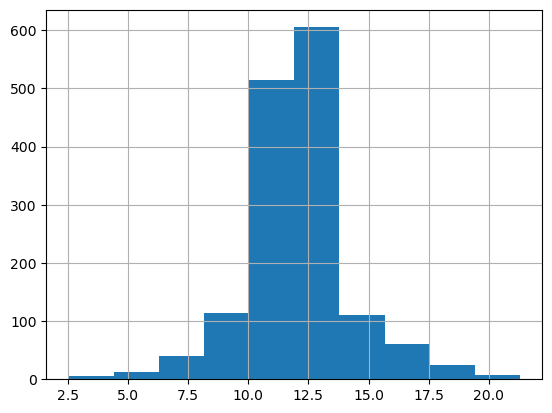

In [11]:
df.interface_pae.hist()

<Axes: >

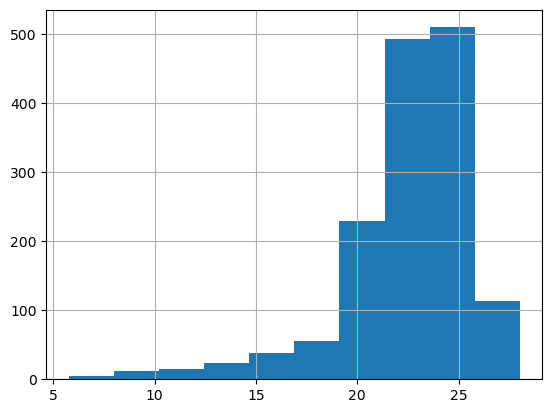

In [12]:
df.off_diagonal_pae.hist()

In [15]:
df_filtered = df[(df.monomer_rmsd < 1.0) & (df.iptm < 0.15) & (df.min_protein_plddt > 80) & (df.off_diagonal_pae > 20) & (df.interface_pae > 12)].copy()
print(df_filtered.parent.value_counts())

parent
pose_02    116
pose_01     86
pose_03     65
pose_00     60
pose_05     58
pose_04     32
Name: count, dtype: int64


In [16]:
opath = Path('./af2_selected/')
opath.mkdir(exist_ok=True)

for gn, gr in df_filtered.groupby('parent'):
    gr.reset_index(drop=True, inplace=True)
    (opath / gn).mkdir(exist_ok=True)
    for idx, row in gr.iterrows():
        monomer = pr.parsePDB(str(row.pdb_path))
        dimer = pr.parsePDB(str(row.af2_dimer_path))
        monomer = pr.calcTransformation(monomer.select('chain A and name CA'), dimer.select('chain A and name CA')).apply(monomer)
        # shutil.copy(row.pdb_path, opath / gn / f"{idx:03d}_monomer.pdb")
        pr.writePDB(str(opath / gn / f"{idx:03d}_monomer.pdb"), monomer)
        shutil.copy(row.af2_dimer_path, opath / gn / f"{idx:03d}_af2_dimer.pdb")